### Test fit

In [1]:
from MCEq.core import config, MCEqRun
import crflux.models as crf
import matplotlib.pyplot as plt
import numpy as np
from numba import njit
import sys
from scipy import stats
from scipy.stats import binom, poisson, norm
from iminuit import Minuit
import iminuit
from sympy.tensor.array import derive_by_array
from numpy import identity, array, dot, matmul
from latex2sympy2 import latex2sympy
from sympy import *
from time import time
r = np.random

sys.path.append('C:\\Users\\Bruger\\AppStat2021\\External_Functions')
import Clotilde_external_functions as cef
import ExternalFunctions as ef
from ExternalFunctions import nice_string_output, add_text_to_ax, UnbinnedLH

#sys.path.append('C:\\Users\\Bruger\\BSc_project')
import oscillation_prob as op
import own_oscillation_prob as oop

plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

## Honda fit with pseudo

Importing the oscillation code and running for values from http://www.nu-fit.org/?q=node/238

In [2]:
DM32_true = 2.51e-3
theta23_true = 42.1/180*np.pi
theta_maxmixing = np.pi/4 #0.79689
theta13 =  8.62/180 * np.pi

print(np.sin(theta23_true))

0.6704266189587991


In [3]:
#t = time()
#prob_numu_to_numu_true, binned_prob_true = op.oscillation_prob(theta23_true, DM32_true)
#print(time() - t)

prop_numu_numu = oop.prob_numu_numu(theta23_true, DM32_true)
prop_numu_nue = oop.prob_numu_nue(theta23_true, DM32_true)
prop_numu_nutau = oop.prob_numu_nutau(theta23_true, DM32_true)

prop_nue_numu = oop.prob_nue_numu(theta23_true, DM32_true)
prop_nue_nue = oop.prob_nue_nue(theta23_true, DM32_true)
prop_nue_nutau = oop.prob_nue_nutau(theta23_true, DM32_true)

In [4]:
numu_cc = np.genfromtxt('numu_cc.csv', skip_header = 1, delimiter =',')
Aeff_numu_cc = numu_cc[:,2]
numu_nc = np.genfromtxt('numu_nc.csv', skip_header = 1, delimiter =',')
Aeff_numu_nc = numu_nc[:,2]

numubar_cc = np.genfromtxt('numubar_cc.csv', skip_header = 1, delimiter =',')
Aeff_numubar_cc = numubar_cc[:,2]
numubar_nc = np.genfromtxt('numubar_nc.csv', skip_header = 1, delimiter =',')
Aeff_numubar_nc = numubar_nc[:,2]

nue_cc = np.genfromtxt('nue_cc.csv', skip_header = 1, delimiter =',')
Aeff_nue_cc = nue_cc[:,2]
nue_nc = np.genfromtxt('nue_nc.csv', skip_header = 1, delimiter =',')
Aeff_nue_nc = nue_nc[:,2]

nuebar_cc = np.genfromtxt('nuebar_cc.csv', skip_header = 1, delimiter =',')
Aeff_nuebar_cc = nuebar_cc[:,2]
nuebar_nc = np.genfromtxt('nuebar_nc.csv', skip_header = 1, delimiter =',')
Aeff_nuebar_nc = nuebar_nc[:,2]

nutau_cc = np.genfromtxt('nutau_cc.csv', skip_header = 1, delimiter =',')
Aeff_nutau_cc = nutau_cc[:,2]
Aeff_nutau_cc[:2] = 0
nutau_nc = np.genfromtxt('nutau_nc.csv', skip_header = 1, delimiter =',')
Aeff_nutau_nc = nutau_nc[:,2]

nutaubar_cc = np.genfromtxt('nutaubar_cc.csv', skip_header = 1, delimiter =',')
Aeff_nutaubar_cc = nutaubar_cc[:,2]
Aeff_nutaubar_cc[:3] = 0
nutaubar_nc = np.genfromtxt('nutaubar_nc.csv', skip_header = 1, delimiter =',')
Aeff_nutaubar_nc = nutaubar_nc[:,2]

# Energy bins
energy_cropped = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\data\\energy_cropped')
energy_min = np.genfromtxt('numu_cc.csv', skip_header = 1, delimiter =',')[:,0]
energy_max = np.genfromtxt('numu_cc.csv', skip_header = 1, delimiter =',')[:,1]
energy_bins = np.digitize(energy_cropped, energy_min)
energy_binwidths = energy_max - energy_min

xticks = np.arange(-0.5, 10.5, 1)
energy_ticklabels = np.append(energy_min, energy_max[-1])
energy_strings = [f'{energy_ticklabels[i]}' for i in range(len(xticks))]

cos_values = np.round(np.arange(1, -1.1, -0.1), 2)
yticks = np.arange(-0.5, 20, 1)
ylabels = [f'{cos_values[i]}' for i in range(len(yticks))]

In [5]:

Honda_rate10_cc = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\data\\Honda_rate10_cc', delimiter=',')
Honda_rate10_nc = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\data\\Honda_rate10_nc', delimiter=',')
MCEq_rate10_cc = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\data\\MCEq_rate10_DPMJETGSF_cc', delimiter=',')
MCEq_rate10_nc = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\data\\MCEq_rate10_DPMJETGSF_nc', delimiter=',')

MCEq_cc_oscillated10 = MCEq_rate10_cc * prop_numu_numu
MCEq_pseudo_data10_cc = MCEq_cc_oscillated10.copy()
MCEq_nc_oscillated10 = MCEq_rate10_nc * prop_numu_numu
MCEq_pseudo_data10_nc = MCEq_nc_oscillated10.copy()

Honda_cc_oscillated10 = Honda_rate10_cc * prop_numu_numu
Honda_pseudo_data10_cc = Honda_cc_oscillated10.copy()
Honda_nc_oscillated10 = Honda_rate10_nc * prop_numu_numu
Honda_pseudo_data10_nc = Honda_nc_oscillated10.copy();


# Honda
Honda_numu_rate10 = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\data\\Honda_numu_rate10', delimiter=',')
Honda_numubar_rate10 = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\data\\Honda_numubar_rate10', delimiter=',')
Honda_nue_rate10 = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\data\\Honda_nue_rate10', delimiter=',')
Honda_nuebar_rate10 = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\data\\Honda_nuebar_rate10', delimiter=',')

Honda_numu_numu_cc = Honda_numu_rate10 * prop_numu_numu *Aeff_numu_cc
Honda_numu_nutau_cc = Honda_numu_rate10 * prop_numu_nutau *Aeff_nutau_cc
Honda_numu_nue_cc = Honda_numu_rate10 * prop_numu_nue *Aeff_nue_cc

Honda_numu_numu_bar_cc = Honda_numubar_rate10 * prop_numu_numu *Aeff_numubar_cc
Honda_numu_nutau_bar_cc = Honda_numubar_rate10 * prop_numu_nutau *Aeff_nutaubar_cc
Honda_numu_nue_bar_cc = Honda_numubar_rate10 * prop_numu_nue *Aeff_nuebar_cc

Honda_nue_numu_cc = Honda_nue_rate10 * prop_nue_numu *Aeff_numu_cc
Honda_nue_nutau_cc = Honda_nue_rate10 * prop_nue_nutau *Aeff_nutau_cc
Honda_nue_nue_cc = Honda_nue_rate10 * prop_nue_nue *Aeff_nue_cc

Honda_nue_numu_bar_cc = Honda_nuebar_rate10 * prop_nue_numu *Aeff_numubar_cc
Honda_nue_nutau_bar_cc = Honda_nuebar_rate10 * prop_nue_nutau *Aeff_nutaubar_cc
Honda_nue_nue_bar_cc = Honda_nuebar_rate10 * prop_nue_nue *Aeff_nuebar_cc

Honda_numu_numu_nc = Honda_numu_rate10 * prop_numu_numu *Aeff_numu_nc
Honda_numu_nutau_nc = Honda_numu_rate10 * prop_numu_nutau *Aeff_nutau_nc
Honda_numu_nue_nc = Honda_numu_rate10 * prop_numu_nue *Aeff_nue_nc

Honda_numu_numu_bar_nc = Honda_numubar_rate10 * prop_numu_numu *Aeff_numubar_nc
Honda_numu_nutau_bar_nc = Honda_numubar_rate10 * prop_numu_nutau *Aeff_nutaubar_nc
Honda_numu_nue_bar_nc = Honda_numubar_rate10 * prop_numu_nue *Aeff_nuebar_nc

Honda_nue_numu_nc = Honda_nue_rate10 * prop_nue_numu *Aeff_numu_nc
Honda_nue_nutau_nc = Honda_nue_rate10 * prop_nue_nutau *Aeff_nutau_nc
Honda_nue_nue_nc = Honda_nue_rate10 * prop_nue_nue *Aeff_nue_nc

Honda_nue_numu_bar_nc = Honda_nuebar_rate10 * prop_nue_numu *Aeff_numubar_nc
Honda_nue_nutau_bar_nc = Honda_nuebar_rate10 * prop_nue_nutau *Aeff_nutaubar_nc
Honda_nue_nue_bar_nc = Honda_nuebar_rate10 * prop_nue_nue *Aeff_nuebar_nc

# MCEq 1D
MCEq1D_numu_rate10 = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\data\\MCEq1D_numu_rate10_new', delimiter=',')
MCEq1D_numubar_rate10 = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\data\\MCEq1D_numubar_rate10_new', delimiter=',')
MCEq1D_nue_rate10 = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\data\\MCEq1D_nue_rate10_new', delimiter=',')
MCEq1D_nuebar_rate10 = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\data\\MCEq1D_nuebar_rate10_new', delimiter=',')

MCEq1D_numu_numu_cc = MCEq1D_numu_rate10 * prop_numu_numu *Aeff_numu_cc
MCEq1D_numu_nutau_cc = MCEq1D_numu_rate10 * prop_numu_nutau *Aeff_nutau_cc
MCEq1D_numu_nue_cc = MCEq1D_numu_rate10 * prop_numu_nue *Aeff_nue_cc
                                   
MCEq1D_numu_numu_bar_cc = MCEq1D_numubar_rate10 * prop_numu_numu *Aeff_numubar_cc
MCEq1D_numu_nutau_bar_cc = MCEq1D_numubar_rate10 * prop_numu_nutau *Aeff_nutaubar_cc
MCEq1D_numu_nue_bar_cc = MCEq1D_numubar_rate10 * prop_numu_nue *Aeff_nuebar_cc                               

MCEq1D_nue_numu_cc = MCEq1D_nue_rate10 * prop_nue_numu *Aeff_numu_cc
MCEq1D_nue_nutau_cc = MCEq1D_nue_rate10 * prop_nue_nutau *Aeff_nutau_cc
MCEq1D_nue_nue_cc = MCEq1D_nue_rate10 * prop_nue_nue *Aeff_nue_cc                           
                                   
MCEq1D_nue_numu_bar_cc = MCEq1D_nuebar_rate10 * prop_nue_numu *Aeff_numubar_cc
MCEq1D_nue_nutau_bar_cc = MCEq1D_nuebar_rate10 * prop_nue_nutau *Aeff_nutaubar_cc
MCEq1D_nue_nue_bar_cc = MCEq1D_nuebar_rate10 * prop_nue_nue *Aeff_nuebar_cc

MCEq1D_numu_numu_nc = MCEq1D_numu_rate10 * prop_numu_numu *Aeff_numu_nc
MCEq1D_numu_nutau_nc = MCEq1D_numu_rate10 * prop_numu_nutau *Aeff_nutau_nc
MCEq1D_numu_nue_nc = MCEq1D_numu_rate10 * prop_numu_nue *Aeff_nue_nc
                                   
MCEq1D_numu_numu_bar_nc = MCEq1D_numubar_rate10 * prop_numu_numu *Aeff_numubar_nc
MCEq1D_numu_nutau_bar_nc = MCEq1D_numubar_rate10 * prop_numu_nutau *Aeff_nutaubar_nc
MCEq1D_numu_nue_bar_nc = MCEq1D_numubar_rate10 * prop_numu_nue *Aeff_nuebar_nc                               

MCEq1D_nue_numu_nc = MCEq1D_nue_rate10 * prop_nue_numu *Aeff_numu_nc
MCEq1D_nue_nutau_nc = MCEq1D_nue_rate10 * prop_nue_nutau *Aeff_nutau_nc
MCEq1D_nue_nue_nc = MCEq1D_nue_rate10 * prop_nue_nue *Aeff_nue_nc                           
                                   
MCEq1D_nue_numu_bar_nc = MCEq1D_nuebar_rate10 * prop_nue_numu *Aeff_numubar_nc
MCEq1D_nue_nutau_bar_nc = MCEq1D_nuebar_rate10 * prop_nue_nutau *Aeff_nutaubar_nc
MCEq1D_nue_nue_bar_nc = MCEq1D_nuebar_rate10 * prop_nue_nue *Aeff_nuebar_nc

# MCEq 2D
MCEq2D_numu_rate10 = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\data\\MCEq2D_numu_rate10', delimiter=',')      # These are placed in MCEq_2d folder
MCEq2D_numubar_rate10 = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\data\\MCEq2D_numubar_rate10', delimiter=',')
MCEq2D_nue_rate10 = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\data\\MCEq2D_nue_rate10', delimiter=',')
MCEq2D_nuebar_rate10 = np.genfromtxt('C:\\Users\\Bruger\\BSc_project\\data\\MCEq2D_nuebar_rate10', delimiter=',')

MCEq2D_numu_numu_cc = MCEq2D_numu_rate10 * prop_numu_numu *Aeff_numu_cc
MCEq2D_numu_nutau_cc = MCEq2D_numu_rate10 * prop_numu_nutau *Aeff_nutau_cc
MCEq2D_numu_nue_cc = MCEq2D_numu_rate10 * prop_numu_nue *Aeff_nue_cc
                                   
MCEq2D_numu_numu_bar_cc = MCEq2D_numubar_rate10 * prop_numu_numu *Aeff_numubar_cc
MCEq2D_numu_nutau_bar_cc = MCEq2D_numubar_rate10 * prop_numu_nutau *Aeff_nutaubar_cc
MCEq2D_numu_nue_bar_cc = MCEq2D_numubar_rate10 * prop_numu_nue *Aeff_nuebar_cc                                 

MCEq2D_nue_numu_cc = MCEq2D_nue_rate10 * prop_nue_numu *Aeff_numu_cc
MCEq2D_nue_nutau_cc = MCEq2D_nue_rate10 * prop_nue_nutau *Aeff_nutau_cc
MCEq2D_nue_nue_cc = MCEq2D_nue_rate10 * prop_nue_nue *Aeff_nue_cc                             
                                   
MCEq2D_nue_numu_bar_cc = MCEq2D_nuebar_rate10 * prop_nue_numu *Aeff_numubar_cc
MCEq2D_nue_nutau_bar_cc = MCEq2D_nuebar_rate10 * prop_nue_nutau *Aeff_nutaubar_cc
MCEq2D_nue_nue_bar_cc = MCEq2D_nuebar_rate10 * prop_nue_nue *Aeff_nuebar_cc

MCEq2D_numu_numu_nc = MCEq2D_numu_rate10 * prop_numu_numu *Aeff_numu_nc
MCEq2D_numu_nutau_nc = MCEq2D_numu_rate10 * prop_numu_nutau *Aeff_nutau_nc
MCEq2D_numu_nue_nc = MCEq2D_numu_rate10 * prop_numu_nue *Aeff_nue_nc
                                   
MCEq2D_numu_numu_bar_nc = MCEq2D_numubar_rate10 * prop_numu_numu *Aeff_numubar_nc
MCEq2D_numu_nutau_bar_nc = MCEq2D_numubar_rate10 * prop_numu_nutau *Aeff_nutaubar_nc
MCEq2D_numu_nue_bar_nc = MCEq2D_numubar_rate10 * prop_numu_nue *Aeff_nuebar_nc                                 

MCEq2D_nue_numu_nc = MCEq2D_nue_rate10 * prop_nue_numu *Aeff_numu_nc
MCEq2D_nue_nutau_nc = MCEq2D_nue_rate10 * prop_nue_nutau *Aeff_nutau_nc
MCEq2D_nue_nue_nc = MCEq2D_nue_rate10 * prop_nue_nue *Aeff_nue_nc                             
                                   
MCEq2D_nue_numu_bar_nc = MCEq2D_nuebar_rate10 * prop_nue_numu *Aeff_numubar_nc
MCEq2D_nue_nutau_bar_nc = MCEq2D_nuebar_rate10 * prop_nue_nutau *Aeff_nutaubar_nc
MCEq2D_nue_nue_bar_nc = MCEq2D_nuebar_rate10 * prop_nue_nue *Aeff_nuebar_nc

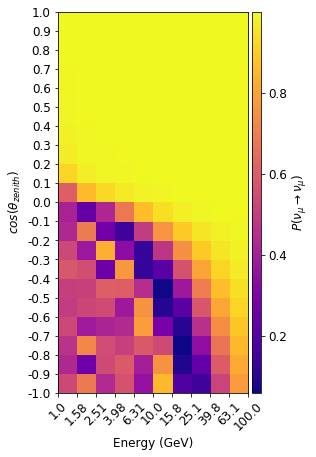

In [6]:
from matplotlib import cm, colors
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(10,7))

im = ax.imshow(prop_numu_numu, cmap='plasma')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'$cos(\theta_{zenith})$')
ax.set_xticks(xticks)
ax.set_xticklabels(energy_strings, rotation = 45)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
cbar_label = r'$P(\nu_{\mu} \rightarrow \nu_{\mu})$'
cbar.set_label(cbar_label)

### Track-like vs cascade-like rate plots

In [7]:
Honda_track_rate = Honda_numu_numu_cc + Honda_nue_numu_cc + Honda_numu_numu_bar_cc + Honda_nue_numu_bar_cc
Honda_cascade_rate = Honda_numu_numu_nc + Honda_nue_numu_nc + Honda_numu_nutau_nc + Honda_numu_nue_nc + Honda_nue_nue_nc \
                        + Honda_nue_nutau_nc + Honda_numu_nutau_cc + Honda_numu_nue_cc + Honda_nue_nue_cc + Honda_nue_nutau_cc \
                        + Honda_numu_numu_bar_nc + Honda_nue_numu_bar_nc + Honda_numu_nutau_bar_nc \
                        + Honda_numu_nue_bar_nc + Honda_nue_nue_bar_nc + Honda_nue_nutau_bar_nc + Honda_numu_nutau_bar_cc \
                        + Honda_numu_nue_bar_cc + Honda_nue_nue_bar_cc + Honda_nue_nutau_bar_cc 


MCEq1d_track = MCEq1D_numu_numu_cc + MCEq1D_nue_numu_cc + MCEq1D_numu_numu_bar_cc + MCEq1D_nue_numu_bar_cc
MCEq1d_cascade = MCEq1D_numu_numu_nc + MCEq1D_nue_numu_nc + MCEq1D_numu_nutau_nc + MCEq1D_numu_nue_nc + MCEq1D_nue_nue_nc \
                        + MCEq1D_nue_nutau_nc + MCEq1D_numu_nutau_cc + MCEq1D_numu_nue_cc + MCEq1D_nue_nue_cc + MCEq1D_nue_nutau_cc \
                        + MCEq1D_numu_numu_bar_nc + MCEq1D_nue_numu_bar_nc + MCEq1D_numu_nutau_bar_nc \
                        + MCEq1D_numu_nue_bar_nc + MCEq1D_nue_nue_bar_nc + MCEq1D_nue_nutau_bar_nc + MCEq1D_numu_nutau_bar_cc \
                        + MCEq1D_numu_nue_bar_cc + MCEq1D_nue_nue_bar_cc + MCEq1D_nue_nutau_bar_cc 

#Honda_rates_cascade = [Honda_numu_rate10, Honda_nue_rate10, Honda_numubar_rate10, Honda_nuebar_rate10]
#Honda_pseudo_cascade

fig, ax = plt.subplots(1, 2, figsize=(10,7))
ax.ravel()

im = ax[0].imshow(Honda_cascade_rate/10, cmap='jet')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax[0].set_xlabel('Energy (GeV)')
ax[0].set_ylabel(r'$cos(\theta_{zenith})$')
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(energy_strings, rotation = 45)
ax[0].set_yticks(yticks)
ax[0].set_yticklabels(ylabels)
cbar_label = ('Cascade-like events per year', fontsize=14)
cbar.set_label(cbar_label)


im = ax[1].imshow(Honda_track_rate/10, cmap='jet')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax[1].set_xlabel('Energy (GeV)', , fontsize=14)
ax[1].set_ylabel(r'$cos(\theta_Z)$', , fontsize=14)
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(energy_strings, rotation = 45, , fontsize=14)
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(ylabels, , fontsize=14)
cbar_label = ('Track-like events per year')
cbar.set_label(cbar_label, fontsize=14)

fig.tight_layout()
fig.savefig('Honda track and cascade rates')

SyntaxError: invalid syntax (<ipython-input-7-3bf447e9bf37>, line 33)

#### $\chi^2$ fit function

In [8]:

def fit_func(rate, osc_func, theta23, DM32, N, delta_gamma):
    
    osc_prob = osc_func(theta23, DM32)
    
    rate_final = rate * osc_prob * N * energy_binwidths**delta_gamma
    
    return rate_final


# Track vs cascade

In [14]:
DM32_lim = (0.002, 0.003)

def chi2_combined(fit_rates, pseudo_data, fit_parameters, guesses, maxmixing_side = 'lower'):
    
    pseudo_track = pseudo_data[0]
    pseudo_cascade = pseudo_data[1]
    
        
    def chi2_owncalc_combined(*fit_parameters):
        
        if len(fit_parameters) ==2:
            #track
            rate_numu_numu = fit_rates[0] * oop.prob_numu_numu(*fit_parameters) *Aeff_numu_cc
            rate_nue_numu = fit_rates[1] * oop.prob_nue_numu(*fit_parameters) *Aeff_numu_cc
            rate_numubar_numubar = fit_rates[2] * oop.prob_numu_numu(*fit_parameters) *Aeff_numubar_cc
            rate_nuebar_numubar = fit_rates[3] * oop.prob_nue_numu(*fit_parameters) *Aeff_numubar_cc
            
            #cascade
            rate_numu_numu_nc = fit_rates[0] * oop.prob_numu_numu(*fit_parameters) *Aeff_numu_nc
            rate_nue_numu_nc = fit_rates[1] * oop.prob_nue_numu(*fit_parameters) *Aeff_numu_nc
            rate_numubar_numubar_nc = fit_rates[2] * oop.prob_numu_numu(*fit_parameters) *Aeff_numubar_nc
            rate_nuebar_numubar_nc= fit_rates[3] * oop.prob_nue_numu(*fit_parameters) *Aeff_numubar_nc

            rate_numu_nutau_nc = fit_rates[0] * oop.prob_numu_nutau(*fit_parameters) *Aeff_nutau_nc
            rate_numu_nue_nc = fit_rates[0] * oop.prob_numu_nue(*fit_parameters) *Aeff_nue_nc
            rate_nue_nue_nc = fit_rates[1] * oop.prob_nue_nue(*fit_parameters) *Aeff_nue_nc
            rate_nue_nutau_nc= fit_rates[1] * oop.prob_nue_nutau(*fit_parameters) *Aeff_nutau_nc

            rate_numubar_nutaubar_nc = fit_rates[2] * oop.prob_numu_nutau(*fit_parameters) *Aeff_nutaubar_nc
            rate_numubar_nuebar_nc = fit_rates[2] * oop.prob_numu_nue(*fit_parameters) *Aeff_nuebar_nc
            rate_nuebar_nuebar_nc = fit_rates[3] * oop.prob_nue_nue(*fit_parameters) *Aeff_nuebar_nc
            rate_nuebar_nutaubar_nc= fit_rates[3] * oop.prob_nue_nutau(*fit_parameters) *Aeff_nutaubar_nc
            
            rate_numu_nutau_cc = fit_rates[0] * oop.prob_numu_nutau(*fit_parameters) *Aeff_nutau_cc
            rate_numu_nue_cc = fit_rates[0] * oop.prob_numu_nue(*fit_parameters) *Aeff_nue_cc
            rate_nue_nue_cc = fit_rates[1] * oop.prob_nue_nue(*fit_parameters) *Aeff_nue_cc
            rate_nue_nutau_cc= fit_rates[1] * oop.prob_nue_nutau(*fit_parameters) *Aeff_nutau_cc

            rate_numubar_nutaubar_cc = fit_rates[2] * oop.prob_numu_nutau(*fit_parameters) *Aeff_nutaubar_cc
            rate_numubar_nuebar_cc = fit_rates[2] * oop.prob_numu_nue(*fit_parameters) *Aeff_nuebar_cc
            rate_nuebar_nuebar_cc = fit_rates[3] * oop.prob_nue_nue(*fit_parameters) *Aeff_nuebar_cc
            rate_nuebar_nutaubar_cc= fit_rates[3] * oop.prob_nue_nutau(*fit_parameters) *Aeff_nutaubar_cc
            
            chi2_penalty = 0
            
        elif len(fit_parameters) ==4:
            #track
            rate_numu_numu = fit_func(fit_rates[0], oop.prob_numu_numu, *fit_parameters) *Aeff_numu_cc
            rate_nue_numu = fit_func(fit_rates[1], oop.prob_nue_numu, *fit_parameters) *Aeff_numu_cc
            rate_numubar_numubar = fit_func(fit_rates[2], oop.prob_numu_numu, *fit_parameters) *Aeff_numubar_cc
            rate_nuebar_numubar = fit_func(fit_rates[3], oop.prob_nue_numu, *fit_parameters) *Aeff_numubar_cc
            
            #cascade
            rate_numu_numu_nc = fit_func(fit_rates[0], oop.prob_numu_numu, *fit_parameters) *Aeff_numu_nc
            rate_nue_numu_nc = fit_func(fit_rates[1], oop.prob_nue_numu, *fit_parameters) *Aeff_numu_nc
            rate_numubar_numubar_nc = fit_func(fit_rates[2], oop.prob_numu_numu, *fit_parameters) *Aeff_numubar_nc
            rate_nuebar_numubar_nc= fit_func(fit_rates[3], oop.prob_nue_numu, *fit_parameters)*Aeff_numubar_nc

            rate_numu_nutau_nc = fit_func(fit_rates[0], oop.prob_numu_nutau, *fit_parameters) *Aeff_nutau_nc
            rate_numu_nue_nc = fit_func(fit_rates[0], oop.prob_numu_nue, *fit_parameters) *Aeff_nue_nc
            rate_nue_nue_nc = fit_func(fit_rates[1], oop.prob_nue_nue, *fit_parameters) *Aeff_nue_nc
            rate_nue_nutau_nc= fit_func(fit_rates[1], oop.prob_nue_nutau, *fit_parameters) *Aeff_nutau_nc

            rate_numubar_nutaubar_nc = fit_func(fit_rates[2], oop.prob_numu_nutau, *fit_parameters) *Aeff_nutaubar_nc
            rate_numubar_nuebar_nc = fit_func(fit_rates[2], oop.prob_numu_nue, *fit_parameters) *Aeff_nuebar_nc
            rate_nuebar_nuebar_nc = fit_func(fit_rates[3], oop.prob_nue_nue, *fit_parameters) *Aeff_nuebar_nc
            rate_nuebar_nutaubar_nc= fit_func(fit_rates[3], oop.prob_nue_nutau, *fit_parameters) *Aeff_nutaubar_nc
            
            rate_numu_nutau_cc = fit_func(fit_rates[0], oop.prob_numu_nutau, *fit_parameters) *Aeff_nutau_cc
            rate_numu_nue_cc = fit_func(fit_rates[0], oop.prob_numu_nue, *fit_parameters) *Aeff_nue_cc
            rate_nue_nue_cc = fit_func(fit_rates[1], oop.prob_nue_nue, *fit_parameters) *Aeff_nue_cc
            rate_nue_nutau_cc= fit_func(fit_rates[1], oop.prob_nue_nutau, *fit_parameters) *Aeff_nutau_cc

            rate_numubar_nutaubar_cc = fit_func(fit_rates[2], oop.prob_numu_nutau, *fit_parameters) *Aeff_nutaubar_cc
            rate_numubar_nuebar_cc = fit_func(fit_rates[2], oop.prob_numu_nue, *fit_parameters) *Aeff_nuebar_cc
            rate_nuebar_nuebar_cc = fit_func(fit_rates[3], oop.prob_nue_nue, *fit_parameters) *Aeff_nuebar_cc
            rate_nuebar_nutaubar_cc= fit_func(fit_rates[3], oop.prob_nue_nutau, *fit_parameters) *Aeff_nutaubar_cc
            
            chi2_penalty = fit_parameters[-1]**2 / 0.1**2
            
            
        fit_data_track = rate_numu_numu + rate_nue_numu + rate_numubar_numubar + rate_nuebar_numubar          
        
        fit_data_cascade = rate_numu_numu_nc + rate_nue_numu_nc + rate_numu_nutau_nc + rate_numu_nue_nc + rate_nue_nue_nc + rate_nue_nutau_nc \
                    + rate_numu_nutau_cc + rate_numu_nue_cc + rate_nue_nue_cc + rate_nue_nutau_cc \
                    + rate_numubar_numubar_nc + rate_nuebar_numubar_nc + rate_numubar_nutaubar_nc + rate_numubar_nuebar_nc + rate_nuebar_nuebar_nc + rate_nuebar_nutaubar_nc \
                    + rate_numubar_nutaubar_cc + rate_numubar_nuebar_cc + rate_nuebar_nuebar_cc + rate_nuebar_nutaubar_cc
        
        global fit_data
        fit_data = fit_data_track + fit_data_cascade
        
        
        chi2_cascade = np.sum(((pseudo_cascade - fit_data_cascade)**2 / fit_data_cascade))
        chi2_track = np.sum(((pseudo_track - fit_data_track)**2 / fit_data_track))
            
        return chi2_cascade + chi2_track + chi2_penalty
    
    chi2_owncalc_combined.errordef = 1.0
    
    if len(fit_parameters)==2:
        minuit = Minuit(chi2_owncalc_combined, theta23 = guesses[0], DM32 = guesses[1] , name=('theta23', 'DM32')) #, limit=[(0, np.pi/2), None])
    
    elif len(fit_parameters)==4:
        minuit = Minuit(chi2_owncalc_combined, theta23 = guesses[0], DM32 = guesses[1] , N = guesses[2], gamma = guesses[3], name=('theta23', 'DM32', 'N', 'gamma'))
        minuit.limits['N'] = (0.5, 1.7)

    if maxmixing_side == 'lower':
        minuit.limits['theta23'] = (0, theta_maxmixing)
    elif maxmixing_side == 'higher':
        minuit.limits['theta23'] = (theta_maxmixing, np.pi/2)
        
    minuit.limits['DM32'] = DM32_lim
    minuit.tol = 0.00001
    minuit.migrad()
    
    N_priors = 0
    
    if len(fit_parameters)==4:
        N_priors = 1
    
    Nvar = len(fit_parameters)               
    Ndof = 200 - Nvar + N_priors
    
    Chi2_fit = minuit.fval          
    Prob_fit = stats.chi2.sf(Chi2_fit, Ndof)
    minuit.migrad()
    
    par = minuit.values[:]
    par_err = minuit.errors[:] 
    par_name = minuit.parameters[:]
    

    return Chi2_fit, Prob_fit, par, par_err, fit_data

In [11]:
def fit_hists(N, rates, pseudo, title, event_type, guess = [theta23_true, DM32_true], true = [theta23_true, DM32_true], savefig = False, 
              asimov= False, normalization=None, gamma=None, maxmixing_side='lower'):
    
    if maxmixing_side == 'higher':
        theta_true = 2*theta_maxmixing- theta23_true
        true[0] = theta_true
        guess[0] = theta_true
    
    fit_params = ['theta23', 'DM32']
    N_ax = 3
        
    if normalization != None:
        guess.append(normalization)
        fit_params.append('N')
        guess.append(gamma)
        fit_params.append('gamma')
        N_ax = 5
    
    if asimov == False:
        chi2_array = np.zeros(N)
        theta23_fits = np.zeros(N)
        DM32_fits = np.zeros(N)
        N_fits = np.zeros(N)
        gamma_fits = np.zeros(N)
        
        for n in range(N):
            pseudo_fluct = r.poisson(pseudo)
            
            if event_type == 'cascade':
                Chi2_fluct, Prob_fit_fluct, par_fluct, par_err_fluct, fit_data = chi_squared_cascade(rates, pseudo_fluct,
                                                                                            fit_params, guess, maxmixing_side)
                
            elif event_type == 'track':
                Chi2_fluct, Prob_fit_fluct, par_fluct, par_err_fluct, fit_data = chi_squared_track(rates, pseudo_fluct,
                                                                                            fit_params, guess, maxmixing_side)
                
            elif event_type == 'combined':
                Chi2_fluct, Prob_fit_fluct, par_fluct, par_err_fluct, fit_data = chi2_combined(rates, pseudo_fluct,
                                                                                            fit_params, guess, maxmixing_side)
            
            chi2_array[n] = Chi2_fluct
            theta23_fits[n] = par_fluct[0]
            DM32_fits[n] =  par_fluct[1]
            
            if normalization!=None:
                N_fits[n] = par_fluct[2]
                gamma_fits[n] = par_fluct[3]
            
    elif asimov:
        theta_guess = np.linspace(0.2, 0.95, 100)  #(0.5, 0.9, 100)
        DM_guess = np.linspace(0.001, 0.003, 100)
        guesses = list(zip(theta_guess, DM_guess))
        
        chi2_array = np.zeros(len(guesses))
        theta23_fits = np.zeros(len(guesses))
        DM32_fits = np.zeros(len(guesses))
    
        for n in range(len(guesses)):

            if event_type == 'cascade':
                Chi2_fluct, Prob_fit_fluct, par_fluct, par_err_fluct = chi_squared_cascade(rates, pseudo,
                                                                                            fit_params, guesses[n], maxmixing_side)
                
            elif event_type == 'track':
                Chi2_fluct, Prob_fit_fluct, par_fluct, par_err_fluct = chi_squared_track(rates, pseudo,
                                                                                            fit_params, guesses[n], maxmixing_side)
                
            elif event_type == 'combined':
                Chi2_fluct, Prob_fit_fluct, par_fluct, par_err_fluct = chi2_combined(rates, pseudo,
                                                                                            fit_params, guesses[n], maxmixing_side)
            
            

            chi2_array[n] = Chi2_fluct
            theta23_fits[n] = par_fluct[0]
            DM32_fits[n] =  par_fluct[1]
            
            
            
    if normalization == None:
        fig, axs = plt.subplots(1, 3, figsize=(15,7))
        ax = [axs[0], axs[1], axs[2]]
    
    elif normalization != None:
        fig, axs = plt.subplots(2, 3, figsize=(15,12))
        axs[1,2].remove()
        ax = [axs[0,0], axs[0,1], axs[0,2], axs[1,0], axs[1,1]]
    
    
    x_labels = [r'$\theta_{23}$ (radians)', r'$\Delta m_{32}^2$ ($eV^2$)', r'$\chi^2$']
    height = N/4
    
    x_theta, y_theta, sy_theta, binwidth_theta, theta23_mean, theta23_std = cef.make_hist(ax[0], theta23_fits, Nbins=20, loc_dic = (0.05, 0.8), 
                                                                                 label=(r'$\theta_{23}$ fit values', ''), errors = False, decimals=4)
    x_dm, y_dm, sy_dm, binwidth_dm, DM32_mean, DM32_std = cef.make_hist(ax[1], DM32_fits, Nbins=20, loc_dic = (0.05, 0.8), 
                                                                                 label=(r'$\Delta m_{32}^2$ fit values', ''),errors = False, decimals=6)
    cef.make_hist(ax[2], chi2_array, Nbins=20, loc_dic = (0.05, 0.85), label=(r'$\chi^2$ fit values', ''), errors = False)

    
    if normalization !=None:
        x_labels.append('N')
        cef.make_hist(axs[1,0], N_fits, Nbins=20, loc_dic = (0.05, 0.85), label=(r'N fit values', ''),
                  errors = False)
        x_labels.append(r'$\Delta \gamma$')
        cef.make_hist(axs[1,1], gamma_fits, Nbins=20, loc_dic = (0.05, 0.85), label=(r'$\Delta \gamma$ fit values', ''),
                  errors = False)        
            

    for n in range(N_ax):
        if n<2:
            ax[n].plot([true[n], true[n]], [0,height/2], 'r-', label='True value')
        ax[n].set_ylim(0,height)
        ax[n].set_ylabel('Counts')
        ax[n].set_xlabel(x_labels[n])
        ax[n].legend(loc='upper left', fontsize=12)   

    plt.suptitle(title, fontsize=20);
    fig.tight_layout(pad=5.0);
    
    if savefig != False:
        fig.savefig(savefig)
    
    return theta23_fits, theta23_mean, theta23_std, DM32_fits, DM32_mean, DM32_std, chi2_array, fit_data, N_fits, gamma_fits

In [12]:
N_runs=1000

Honda_rates = [Honda_numu_rate10, Honda_nue_rate10, Honda_numubar_rate10, Honda_nuebar_rate10]
Honda_pseudo_track = Honda_numu_numu_cc + Honda_nue_numu_cc + Honda_numu_numu_bar_cc + Honda_nue_numu_bar_cc
Honda_pseudo_cascade = Honda_numu_numu_nc + Honda_nue_numu_nc + Honda_numu_nutau_nc + Honda_numu_nue_nc \
+ Honda_nue_nue_nc + Honda_nue_nutau_nc + Honda_numu_nutau_cc + Honda_numu_nue_cc + Honda_nue_nue_cc \
+ Honda_nue_nutau_cc + Honda_numu_numu_bar_nc + Honda_nue_numu_bar_nc + Honda_numu_nutau_bar_nc \
+ Honda_numu_nue_bar_nc + Honda_nue_nue_bar_nc + Honda_nue_nutau_bar_nc + Honda_numu_nutau_bar_cc \
+ Honda_numu_nue_bar_cc + Honda_nue_nue_bar_cc + Honda_nue_nutau_bar_cc 

MCEq1D_rates = [MCEq1D_numu_rate10, MCEq1D_nue_rate10, MCEq1D_numubar_rate10, MCEq1D_nuebar_rate10]
MCEq1D_pseudo_track = MCEq1D_numu_numu_cc + MCEq1D_nue_numu_cc + MCEq1D_numu_numu_bar_cc + MCEq1D_nue_numu_bar_cc
MCEq1D_pseudo_cascade = MCEq1D_numu_numu_nc + MCEq1D_nue_numu_nc + MCEq1D_numu_nutau_nc + MCEq1D_numu_nue_nc \
+ MCEq1D_nue_nue_nc + MCEq1D_nue_nutau_nc + MCEq1D_numu_nutau_cc + MCEq1D_numu_nue_cc + MCEq1D_nue_nue_cc \
+ MCEq1D_nue_nutau_cc + MCEq1D_numu_numu_bar_nc + MCEq1D_nue_numu_bar_nc + MCEq1D_numu_nutau_bar_nc \
+ MCEq1D_numu_nue_bar_nc + MCEq1D_nue_nue_bar_nc + MCEq1D_nue_nutau_bar_nc + MCEq1D_numu_nutau_bar_cc \
+ MCEq1D_numu_nue_bar_cc + MCEq1D_nue_nue_bar_cc + MCEq1D_nue_nutau_bar_cc 

MCEq2D_rates = [MCEq2D_numu_rate10, MCEq2D_nue_rate10, MCEq2D_numubar_rate10, MCEq2D_nuebar_rate10]
MCEq2D_pseudo_track = MCEq2D_numu_numu_cc + MCEq2D_nue_numu_cc + MCEq2D_numu_numu_bar_cc + MCEq2D_nue_numu_bar_cc
MCEq2D_pseudo_cascade = MCEq2D_numu_numu_nc + MCEq2D_nue_numu_nc + MCEq2D_numu_nutau_nc + MCEq2D_numu_nue_nc \
+ MCEq2D_nue_nue_nc + MCEq2D_nue_nutau_nc + MCEq2D_numu_nutau_cc + MCEq2D_numu_nue_cc + MCEq2D_nue_nue_cc \
+ MCEq2D_nue_nutau_cc + MCEq2D_numu_numu_bar_nc + MCEq2D_nue_numu_bar_nc + MCEq2D_numu_nutau_bar_nc \
+ MCEq2D_numu_nue_bar_nc + MCEq2D_nue_nue_bar_nc + MCEq2D_nue_nutau_bar_nc + MCEq2D_numu_nutau_bar_cc \
+ MCEq2D_numu_nue_bar_cc + MCEq2D_nue_nue_bar_cc + MCEq2D_nue_nutau_bar_cc 

### Honda to MCEq 1d comparison

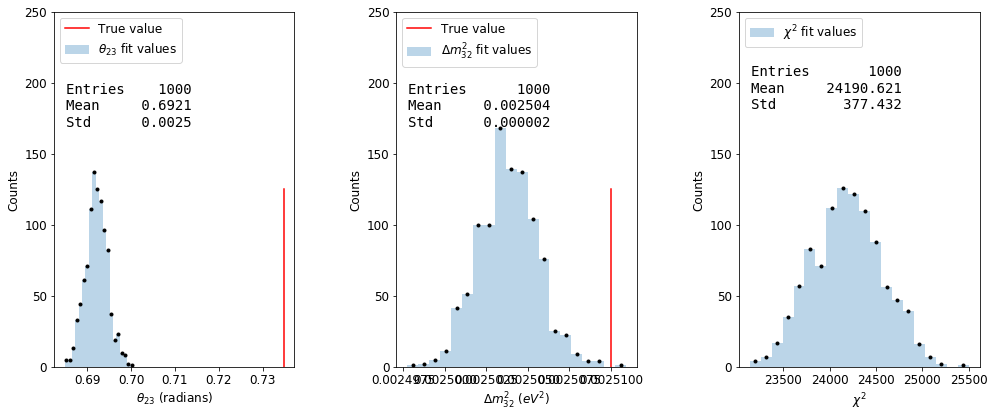

In [15]:
theta23_oldfits_MCEq1DtoHonda_combined, theta23_oldmean_MCEq1DtoHonda_combined, theta23_oldstd_MCEq1DtoHonda_combined, DM32_oldfits_MCEq1DtoHonda_combined, \
DM32_oldmean_MCEq1DtoHonda_combined, DM32_oldstd_MCEq1DtoHonda_combined, chi2old_MCEq1DtoHonda_combined, _, _,_ = \
            fit_hists(N_runs, MCEq1D_rates, [Honda_pseudo_track, Honda_pseudo_cascade], 
                      title ='', event_type='combined')

In [19]:
np.savetxt('theta23_oldfits_MCEq1DtoHonda_combined', theta23_oldfits_MCEq1DtoHonda_combined, delimiter=',')
np.savetxt('DM32_oldfits_MCEq1DtoHonda_combined', DM32_oldfits_MCEq1DtoHonda_combined, delimiter=',')
np.savetxt('chi2old_MCEq1DtoHonda_combined', chi2old_MCEq1DtoHonda_combined, delimiter=',')

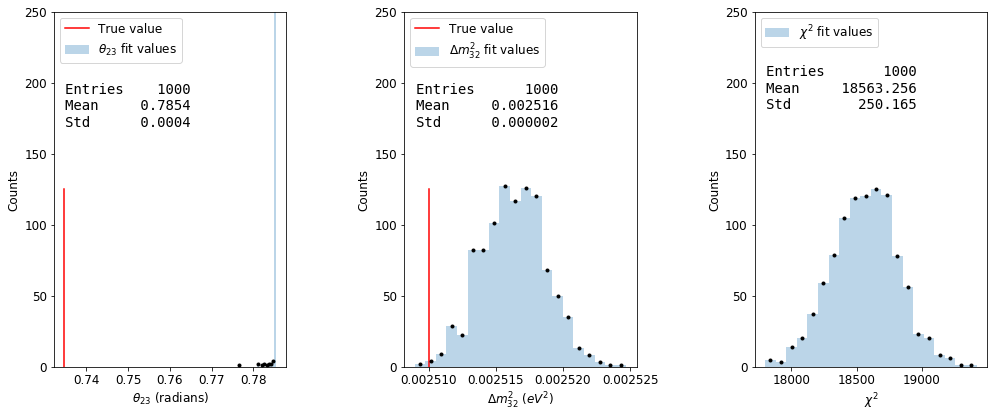

In [16]:
# run tonight (old) (14)
theta23_oldfits_HondatoMCEq1D_combined, theta23_oldmean_HondatoMCEq1D_combined, theta23_oldstd_HondatoMCEq1D_combined, DM32_oldfits_HondatoMCEq1D_combined, \
DM32_oldmean_HondatoMCEq1D_combined, DM32_oldstd_HondatoMCEq1D_combined, chi2old_HondatoMCEq1D_combined, _, _,_ = \
            fit_hists(N_runs, Honda_rates, [MCEq1D_pseudo_track, MCEq1D_pseudo_cascade], 
                      title ='', event_type='combined')

In [20]:
np.savetxt('theta23_oldfits_HondatoMCEq1D_combined10', theta23_oldfits_HondatoMCEq1D_combined, delimiter=',')
np.savetxt('DM32_oldfits_HondatoMCEq1D_combined10', DM32_oldfits_HondatoMCEq1D_combined, delimiter=',')
np.savetxt('chi2old_HondatoMCEq1D_combined10', chi2old_HondatoMCEq1D_combined, delimiter=',')

#### with N and gamma

C:\Users\Bruger\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
C:\Users\Bruger\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in multiply
C:\Users\Bruger\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in multiply
C:\Users\Bruger\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in multiply
C:\Users\Bruger\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in multiply
C:\Users\Bruger\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Bruger\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Bruger\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in true_divide


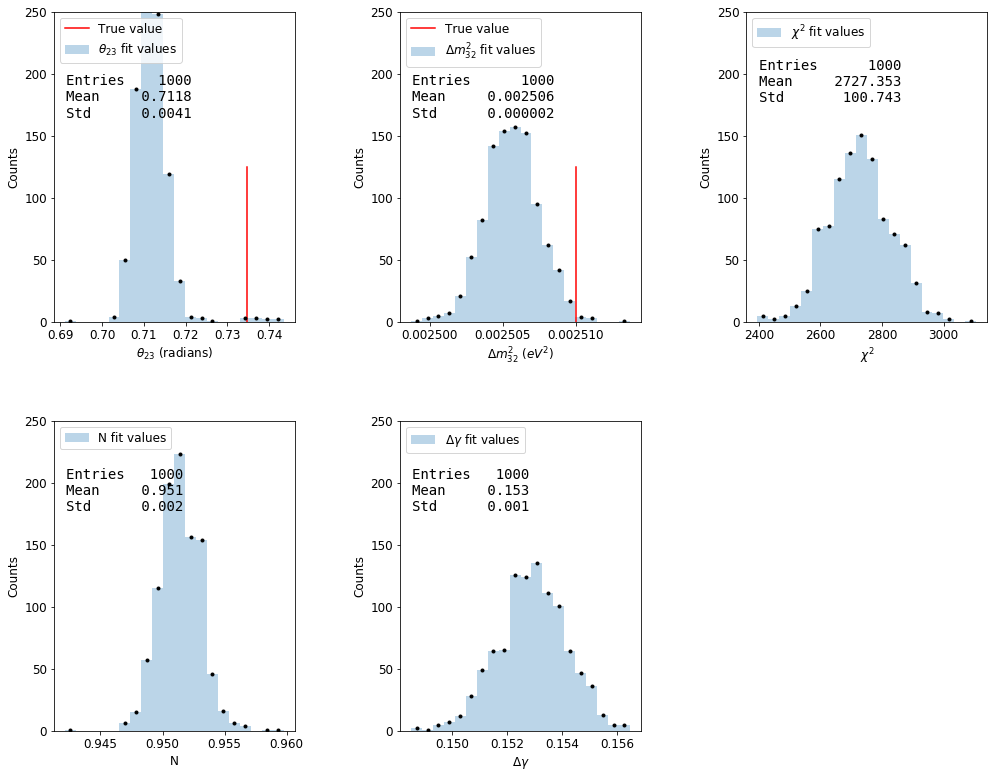

In [17]:
# run tonight
theta23_newfits_MCEq1DtoHonda_combined, theta23_newmean_MCEq1DtoHonda_combined, theta23_newstd_MCEq1DtoHonda_combined, DM32_newfits_MCEq1DtoHonda_combined, \
DM32_newmean_MCEq1DtoHonda_combined, DM32_newstd_MCEq1DtoHonda_combined, chi2new_MCEq1DtoHonda_combined, _, N_MCEq1DtoHonda_combined, gamma_MCEq1DtoHonda_combined = \
            fit_hists(N_runs, MCEq1D_rates, [Honda_pseudo_track, Honda_pseudo_cascade],
                      title ='', event_type='combined', normalization=1, gamma=0)

In [21]:
np.savetxt('theta23_newfits_MCEq1DtoHonda_combined10', theta23_newfits_MCEq1DtoHonda_combined, delimiter=',')
np.savetxt('DM32_newfits_MCEq1DtoHonda_combined10', DM32_newfits_MCEq1DtoHonda_combined, delimiter=',')
np.savetxt('chi2new_MCEq1DtoHonda_combined10', chi2new_MCEq1DtoHonda_combined, delimiter=',')
np.savetxt('N_MCEq1DtoHonda_combined10', N_MCEq1DtoHonda_combined, delimiter=',')
np.savetxt('gamma_MCEq1DtoHonda_combined10', gamma_MCEq1DtoHonda_combined, delimiter=',')

In [ ]:
# run tonight (14)
theta23_newfits_HondatoMCEq1D_combined, theta23_newmean_HondatoMCEq1D_combined, theta23_newstd_HondatoMCEq1D_combined, DM32_newfits_HondatoMCEq1D_combined, \
DM32_newmean_HondatoMCEq1D_combined, DM32_newstd_HondatoMCEq1D_combined, chi2new_HondatoMCEq1D_combined, _, N_HondatoMCEq1D_combined, gamma_HondatoMCEq1D_combined = \
            fit_hists(N_runs, Honda_rates, [MCEq1D_pseudo_track, MCEq1D_pseudo_cascade], 
                      title ='', event_type='combined', normalization=1, gamma=0)

In [ ]:
np.savetxt('theta23_newfits_HondatoMCEq1D_combined10', theta23_newfits_HondatoMCEq1D_combined, delimiter=',')
np.savetxt('DM32_newfits_HondatoMCEq1D_combined10', DM32_newfits_HondatoMCEq1D_combined, delimiter=',')
np.savetxt('chi2new_HondatoMCEq1D_combined10', chi2new_HondatoMCEq1D_combined, delimiter=',')
np.savetxt('N_HondatoMCEq1D_combined10', N_HondatoMCEq1D_combined, delimiter=',')
np.savetxt('gamma_HondatoMCEq1D_combined10', gamma_HondatoMCEq1D_combined, delimiter=',')

### Honda to MCEq 2d comparison

In [ ]:
# run tonight
theta23_newfits_HondatoMCEq2D_combined, theta23_newmean_HondatoMCEq2D_combined, theta23_newstd_HondatoMCEq2D_combined, DM32_newfits_HondatoMCEq2D_combined, \
DM32_newmean_HondatoMCEq2D_combined, DM32_newstd_HondatoMCEq2D_combined, chi2new_HondatoMCEq2D_combined, _, N_HondatoMCEq2D_combined, gamma_HondatoMCEq2D_combined = \
            fit_hists(N_runs, Honda_rates, [MCEq2D_pseudo_track, MCEq2D_pseudo_cascade], 
                      title ='Honda to MCEq-2d combined', event_type='combined', normalization=1, gamma=0)

In [ ]:
np.savetxt('theta23_newfits_HondatoMCEq2D_combined10', theta23_newfits_HondatoMCEq2D_combined, delimiter=',')
np.savetxt('DM32_newfits_HondatoMCEq2D_combined10', DM32_newfits_HondatoMCEq2D_combined, delimiter=',')
np.savetxt('chi2new_HondatoMCEq2D_combined10', chi2new_HondatoMCEq2D_combined, delimiter=',')
np.savetxt('N_HondatoMCEq2D_combined10', N_HondatoMCEq2D_combined, delimiter=',')
np.savetxt('gamma_HondatoMCEq2D_combined10', gamma_HondatoMCEq2D_combined, delimiter=',')

In [ ]:
# run tonight
theta23_newfits_MCEq2DtoHonda_combined, theta23_newmean_MCEq2DtoHonda_combined, theta23_newstd_MCEq2DtoHonda_combined, DM32_newfits_MCEq2DtoHonda_combined, \
DM32_newmean_MCEq2DtoHonda_combined, DM32_newstd_MCEq2DtoHonda_combined, chi2new_MCEq2DtoHonda_combined, _, N_MCEq2DtoHonda_combined, gamma_MCEq2DtoHonda_combined = \
            fit_hists(N_runs, MCEq2D_rates, [Honda_pseudo_track, Honda_pseudo_cascade], 
                      title ='MCEq-2d to Honda combined', event_type='combined', normalization=1, gamma=0)

In [ ]:
np.savetxt('theta23_newfits_MCEq2DtoHonda_combined10', theta23_newfits_HondatoMCEq2D_combined, delimiter=',')
np.savetxt('DM32_newfits_MCEq2DtoHonda_combined10', DM32_newfits_MCEq2DtoHonda_combined, delimiter=',')
np.savetxt('chi2new_MCEq2DtoHonda_combined10', chi2new_MCEq2DtoHonda_combined, delimiter=',')
np.savetxt('N_MCEq2DtoHonda_combined10', N_MCEq2DtoHonda_combined, delimiter=',')
np.savetxt('gamma_MCEq2DtoHonda_combined10', gamma_MCEq2DtoHonda_combined, delimiter=',')

### MCEq 1d to 2d 

In [ ]:
# run tonight
# combined
theta23_fits_MCEq1Dto2D_combined, theta23_mean_MCEq1Dto2D_combined, theta23_std_MCEq1Dto2D_combined, DM32_fits_MCEq1Dto2D_combined, \
DM32_mean_MCEq1Dto2D_combined, DM32_std_MCEq1Dto2D_combined, chi2_MCEq1Dto2D_combined,_,_,_ = \
            fit_hists(N_runs, MCEq1D_rates, [MCEq2D_pseudo_track, MCEq2D_pseudo_cascade], title ='', 
                      event_type='combined', normalization=None) # MCEq-1d to MCEq-2d combined

In [ ]:
np.savetxt('theta23_fits_MCEq1Dto2D_combined10', theta23_fits_MCEq1Dto2D_combined, delimiter=',')
np.savetxt('DM32_fits_MCEq1Dto2D_combined10', DM32_fits_MCEq1Dto2D_combined, delimiter=',')
np.savetxt('chi2_MCEq1Dto2D_combined10', chi2_MCEq1Dto2D_combined, delimiter=',')

In [ ]:
# run tonight
theta23_fits_MCEq2Dto1D_combined, theta23_mean_MCEq2Dto1D_combined, theta23_std_MCEq2Dto1D_combined, DM32_fits_MCEq2Dto1D_combined, \
DM32_mean_MCEq2Dto1D_combined, DM32_std_MCEq2Dto1D_combined, chi2_MCEq2Dto1D_combined, _, _,_ = \
            fit_hists(N_runs, MCEq2D_rates, [MCEq1D_pseudo_track, MCEq1D_pseudo_cascade], title ='', 
                      event_type='combined', normalization=None) #, savefig='MCEq-2d to MCEq-1d combined')

In [ ]:
np.savetxt('theta23_fits_MCEq2Dto1D_combined10', theta23_fits_MCEq2Dto1D_combined, delimiter=',')
np.savetxt('DM32_fits_MCEq2Dto1D_combined10', DM32_fits_MCEq2Dto1D_combined, delimiter=',')
np.savetxt('chi2_MCEq2Dto1D_combined10', chi2_MCEq2Dto1D_combined, delimiter=',')

In [ ]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# confidence intervals

def confidence_ellipse(x, y, ax, n_std, facecolor='none', **kwargs):
    # from https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html
    
    
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])

    ell_radius_x = np.sqrt(1 + pearson)      #why?
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0,0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    # why rotate?

    ellipse.set_transform(transf + ax.transData)  # what?
    ellipse_plot = ax.add_patch(ellipse)
    
    return ellipse, ellipse_plot

In [ ]:
import matplotlib.lines as mlines
n_sigma90 = 2.1460

fig, ax = plt.subplots(figsize=(11, 7))

mu_1dto2d_combined = np.sin(theta23_mean_MCEq1Dto2D_combined)**2, DM32_mean_MCEq1Dto2D_combined
mu_1dtoHonda_combinednew = np.sin(theta23_newmean_MCEq1DtoHonda_combined)**2, DM32_newmean_MCEq1DtoHonda_combined
mu_2dtoHonda_combinednew = np.sin(theta23_newmean_MCEq2DtoHonda_combined)**2, DM32_newmean_MCEq2DtoHonda_combined


contour_1dto2d_combined, _ = confidence_ellipse(np.sin(theta23_fits_MCEq1Dto2D_combined)**2, DM32_fits_MCEq1Dto2D_combined, ax, n_std=n_sigma90,
                                                label=r'1d to 2d ($90\%$)', edgecolor='forestgreen')
contour_1dtoHonda_combinednew, _ = confidence_ellipse(np.sin(theta23_newfits_MCEq1DtoHonda_combined)**2, DM32_newfits_MCEq1DtoHonda_combined, ax, n_std=n_sigma90,
                                                label=r'1d to Honda ($90\%$)', edgecolor='firebrick')
contour_2dtoHonda_combinednew, _ = confidence_ellipse(np.sin(theta23_newfits_MCEq2DtoHonda_combined)**2, DM32_newfits_MCEq2DtoHonda_combined, ax, n_std=n_sigma90,
                                                label=r'2d to Honda ($90\%$)', edgecolor='navy')

mu_2dto1d_combined = np.sin(theta23_mean_MCEq2Dto1D_combined)**2, DM32_mean_MCEq2Dto1D_combined
mu_Hondato1d_combinednew = np.sin(theta23_newmean_HondatoMCEq1D_combined)**2, DM32_newmean_HondatoMCEq1D_combined
mu_Hondato2d_combinednew = np.sin(theta23_newmean_HondatoMCEq2D_combined)**2, DM32_newmean_HondatoMCEq2D_combined

contour_2dto1d_combined, _ = confidence_ellipse(np.sin(theta23_fits_MCEq2Dto1D_combined)**2, DM32_fits_MCEq2Dto1D_combined, ax, n_std=n_sigma90,
                                                label=r'2d to 1d ($90\%$)', edgecolor='forestgreen', linestyle='--')
contour_Hondato1d_combinednew, _ = confidence_ellipse(np.sin(theta23_newfits_HondatoMCEq1D_combined)**2, DM32_newfits_HondatoMCEq1D_combined, ax, n_std=n_sigma90,
                                                label=r'Honda to 1d ($90\%$)', edgecolor='firebrick', linestyle='--')
contour_Hondato2d_combinednew, _ = confidence_ellipse(np.sin(theta23_newfits_HondatoMCEq2D_combined)**2, DM32_newfits_HondatoMCEq2D_combined, ax, n_std=n_sigma90,
                                                label=r'Honda to 2d ($90\%$)', edgecolor='navy', linestyle='--')


ax.plot(mu_1dto2d_combined[0], mu_1dto2d_combined[1], 'o', color='forestgreen')
ax.plot(mu_1dtoHonda_combinednew[0], mu_1dtoHonda_combinednew[1], 'o', color='firebrick')
ax.plot(mu_2dtoHonda_combinednew[0], mu_2dtoHonda_combinednew[1], 'o', color='navy')

ax.plot(mu_2dto1d_combined[0], mu_2dto1d_combined[1], 'o', color='forestgreen', fillstyle='none')
ax.plot(mu_Hondato1d_combinednew[0], mu_Hondato1d_combinednew[1], 'o', color='firebrick', fillstyle='none')
ax.plot(mu_Hondato2d_combinednew[0], mu_Hondato2d_combinednew[1], 'o', color='navy', fillstyle='none')


ax.plot(np.sin(theta23_true)**2, DM32_true, 'k*', label='True value')

handles, labels = plt.gca().get_legend_handles_labels()

best_fit = mlines.Line2D([], [], color='k', fillstyle='none', marker='o', linestyle='None', label='Best fit')

handles.extend([best_fit])

plt.legend(handles=handles)

ax.set_xlabel(r'$sin(\theta_{23})^2$')    #(r'$\theta_{23}$ (radians)')
ax.set_ylabel(r'$\Delta m_{32}^2$ ($eV^2$)');
#fig.savefig('contours10')